In [392]:
### Here’s a summary of the variables in your Lumpy Skin Disease (LSD) dataset:

#Geographic Coordinates:
##x (Longitude) and y (Latitude): Indicate the location where LSD cases are reported.
#Climatic and Environmental Variables:

#cld (Cloud Cover): Percentage of cloud cover.
#dtr (Diurnal Temperature Range): Difference between daily max and min temperatures.
#frs (Frost Days): Number of days with temperatures below freezing.
#pet (Potential Evapotranspiration): Measures the potential water evaporation and plant transpiration.
#pre (Precipitation): Total rainfall in the area.
#tmn (Minimum Temperature): Daily lowest temperature.
#tmp (Average Temperature): Average temperature in the region.
#tmx (Maximum Temperature): Daily highest temperature.
#vap (Vapor Pressure): Humidity levels, indicating moisture in the air.
#wet (Wet Days): Number of days with significant rainfall.

#Physical and Land Variables:
#elevation: Altitude of the location.
#dominant_land_cover: Type of land cover (e.g., forest, grassland, agriculture).

#Livestock Density:
#X5_Ct_2010_Da (Cattle Density 2010): Density of cattle per square kilometer.
#X5_Bf_2010_Da (Buffalo Density 2010): Density of buffalo per square kilometer.

In [99]:
 
import pandas as pd
import numpy as np
 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
 
 
 

In [101]:
df=pd.read_csv("C:\\Users\\heba\\Downloads\\Lumpy skin disease data.csv\\Lumpy skin disease data.csv")

df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [86]:
df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [102]:
# Renaming the columns
df.rename(columns={
    'x': 'Longitude',
    'y': 'Latitude',
    'cld': 'Cloud_Cover_Percentage',
    'dtr': 'Diurnal_Temp_Range',
    'frs': 'Frost_Days',
    'pet': 'Evapotranspiration',
    'pre': 'Precipitation_Amount',
    'tmn': 'Min_Temp',
    'tmp': 'Mean_Temp',
    'tmx': 'Max_Temp',
    'vap': 'Vapor_Pressure',
    'wet': 'Wet_Days_Count',
    'dominant_land_cover': 'Land_Cover',
    'X5_Ct_2010_Da': 'Buffalo_Population',
    'X5_Bf_2010_Da': 'Cattle_Population',
}, inplace=True)

# Display the renamed DataFrame
df.head()

,Longitude,Latitude,region,country,reportingDate,Cloud_Cover_Percentage,Diurnal_Temp_Range,Frost_Days,Evapotranspiration,Precipitation_Amount,Min_Temp,Mean_Temp,Max_Temp,Vapor_Pressure,Wet_Days_Count,elevation,Land_Cover,Buffalo_Population,Cattle_Population,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


## Exploratory Data Analysis (EDA) ##


In [72]:
# number of rows , number of column #
df.shape

(24803, 20)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitude               24803 non-null  float64
 1   Latitude                24803 non-null  float64
 2   region                  3039 non-null   object 
 3   country                 3039 non-null   object 
 4   reportingDate           3039 non-null   object 
 5   Cloud_Cover_Percentage  24803 non-null  float64
 6   Diurnal_Temp_Range      24803 non-null  float64
 7   Frost_Days              24803 non-null  float64
 8   Evapotranspiration      24803 non-null  float64
 9   Precipitation_Amount    24803 non-null  float64
 10  Min_Temp                24803 non-null  float64
 11  Mean_Temp               24803 non-null  float64
 12  Max_Temp                24803 non-null  float64
 13  Vapor_Pressure          24803 non-null  float64
 14  Wet_Days_Count          24803 non-null

In [36]:
df.describe()

,Longitude,Latitude,Cloud_Cover_Percentage,Diurnal_Temp_Range,Frost_Days,Evapotranspiration,Precipitation_Amount,Min_Temp,Mean_Temp,Max_Temp,Vapor_Pressure,Wet_Days_Count,elevation,Land_Cover,Buffalo_Population,Cattle_Population,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [37]:
# check on duplicate #
df.duplicated().sum()

608

In [103]:
## drop duplicate_values #
df=df.drop_duplicates()

In [39]:
# check missing value in data #
df.isna().sum()

Longitude                     0
Latitude                      0
region                    21764
country                   21764
reportingDate             21764
Cloud_Cover_Percentage        0
Diurnal_Temp_Range            0
Frost_Days                    0
Evapotranspiration            0
Precipitation_Amount          0
Min_Temp                      0
Mean_Temp                     0
Max_Temp                      0
Vapor_Pressure                0
Wet_Days_Count                0
elevation                     0
Land_Cover                    0
Buffalo_Population            0
Cattle_Population             0
lumpy                         0
dtype: int64

In [40]:
## percentage of missing of columns
round(df.isnull().mean() * 100, 0)

Longitude                  0.0
Latitude                   0.0
region                    90.0
country                   90.0
reportingDate             90.0
Cloud_Cover_Percentage     0.0
Diurnal_Temp_Range         0.0
Frost_Days                 0.0
Evapotranspiration         0.0
Precipitation_Amount       0.0
Min_Temp                   0.0
Mean_Temp                  0.0
Max_Temp                   0.0
Vapor_Pressure             0.0
Wet_Days_Count             0.0
elevation                  0.0
Land_Cover                 0.0
Buffalo_Population         0.0
Cattle_Population          0.0
lumpy                      0.0
dtype: float64

In [41]:
df["Land_Cover"].unique()

array([ 2,  3,  4,  9,  1,  5, 11,  8, 10,  6,  0,  7], dtype=int64)

#### drop_columns('region','country','reportingDate') is missing value 90% 
drop(land_cover) is unique value and  hasn't any description for this column

In [104]:

df=df.drop(columns=['region','country','reportingDate','Land_Cover'],axis=1)
df.head()

,Longitude,Latitude,Cloud_Cover_Percentage,Diurnal_Temp_Range,Frost_Days,Evapotranspiration,Precipitation_Amount,Min_Temp,Mean_Temp,Max_Temp,Vapor_Pressure,Wet_Days_Count,elevation,Buffalo_Population,Cattle_Population,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,27970.983100,3691.746950,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,25063.646690,671.326701,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,6038.477155,1426.839831,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,270.367426,0.000000,1


In [90]:
df.isna().sum()

Longitude                 0
Latitude                  0
Cloud_Cover_Percentage    0
Diurnal_Temp_Range        0
Frost_Days                0
Evapotranspiration        0
Precipitation_Amount      0
Min_Temp                  0
Mean_Temp                 0
Max_Temp                  0
Vapor_Pressure            0
Wet_Days_Count            0
elevation                 0
Buffalo_Population        0
Cattle_Population         0
lumpy                     0
dtype: int64

#### Drop rows where Latitude is not between -90 and 90
#### Drop rows where Longitude is not between -180 and 180


In [91]:


# Drop rows where Latitude is not between -90 and 90
df = df.drop(df[(df['Latitude'] < -90) | (df['Latitude'] > 90)].index)

# Drop rows where Longitude is not between -180 and 180
df = df.drop(df[(df['Longitude'] < -180) | (df['Longitude'] > 180)].index)

# Now, df will only contain rows where Latitude and Longitude are within valid ranges


In [45]:
df.shape

(24195, 16)

### mape for distribute dataset

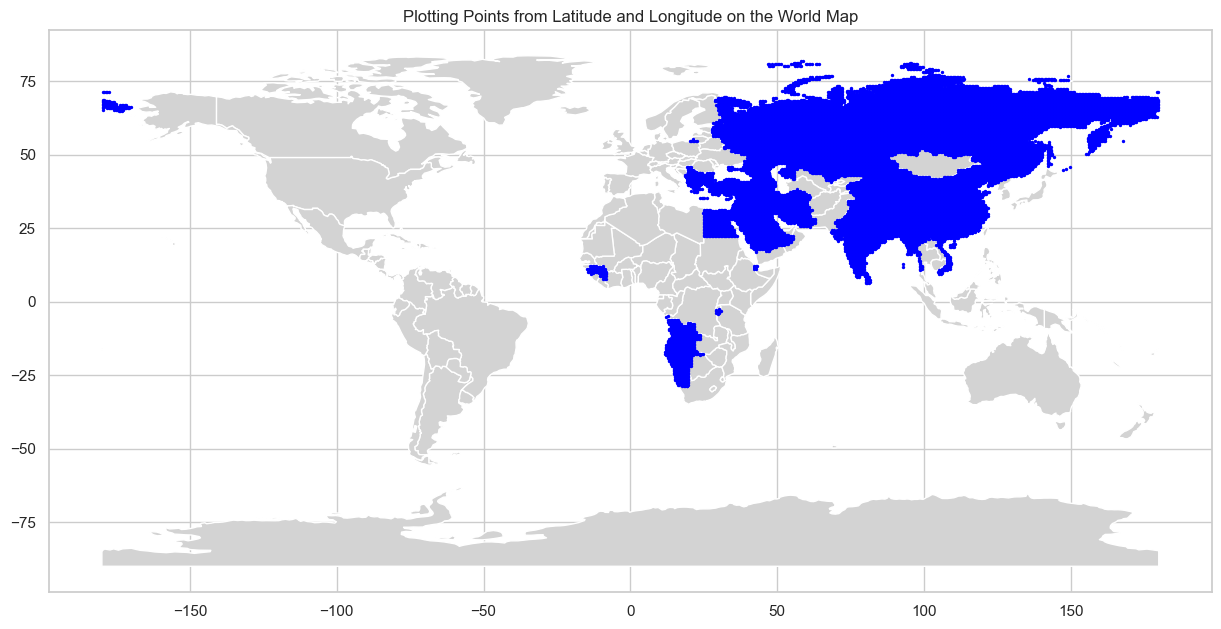

In [46]:


fig, ax = plt.subplots(figsize=(15, 10))

world = gpd.read_file('C:\\Users\\heba\\Downloads\\Final Project\\Final Project\\ne_110m_admin_0_countries.dbf')  # Update with the correct path

# Plot the world map
world.plot(ax=ax, color='lightgrey')

plt.scatter(df['Longitude'], df['Latitude'], color='blue', marker='o', s=2)

# Set title
plt.title('Plotting Points from Latitude and Longitude on the World Map')

# Show the plot
plt.show()

### box_plot for numerical

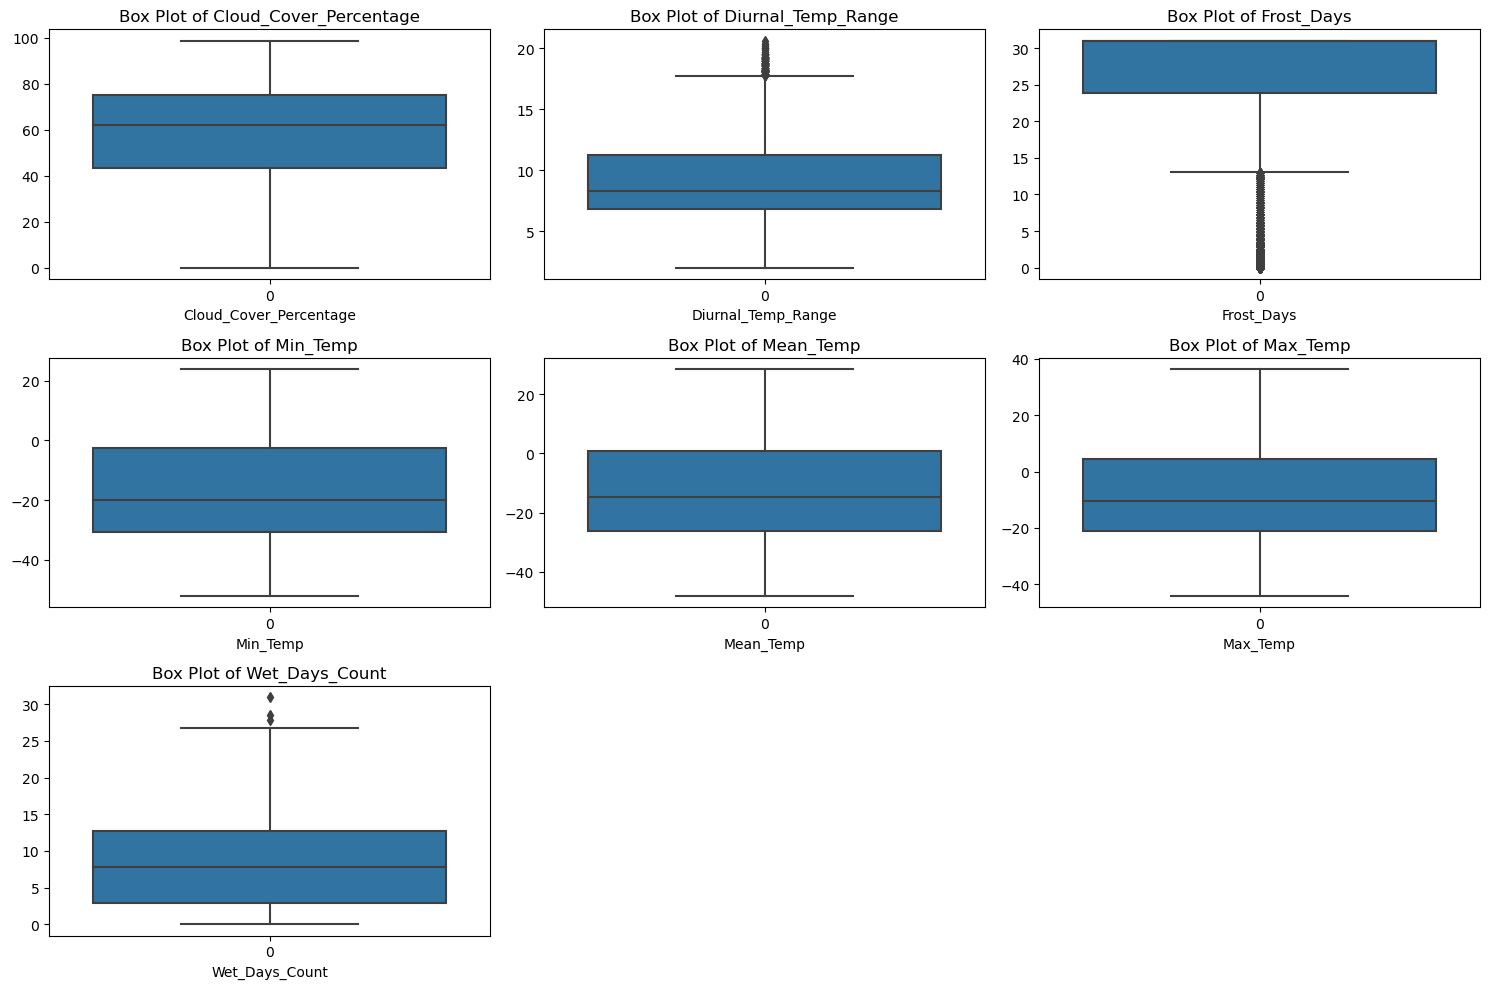

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, columns, figsize=(15, 10)):
     
    plt.figure(figsize=figsize)

    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)  # Create a grid layout for subplots
        sns.boxplot(data=df[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)

    plt.tight_layout()  # Adjust layout to fit all subplots
    plt.show()

# Sample DataFrame (Replace this with your actual DataFrame)
 

 
# List of columns to plot
columns_to_plot = [
    'Cloud_Cover_Percentage', 
    'Diurnal_Temp_Range', 
    'Frost_Days', 
    'Min_Temp', 
    'Mean_Temp', 
    'Max_Temp', 
    'Wet_Days_Count'
]

# Call the function to create box plots
plot_boxplots(df, columns_to_plot)


### histogram_numerical columns

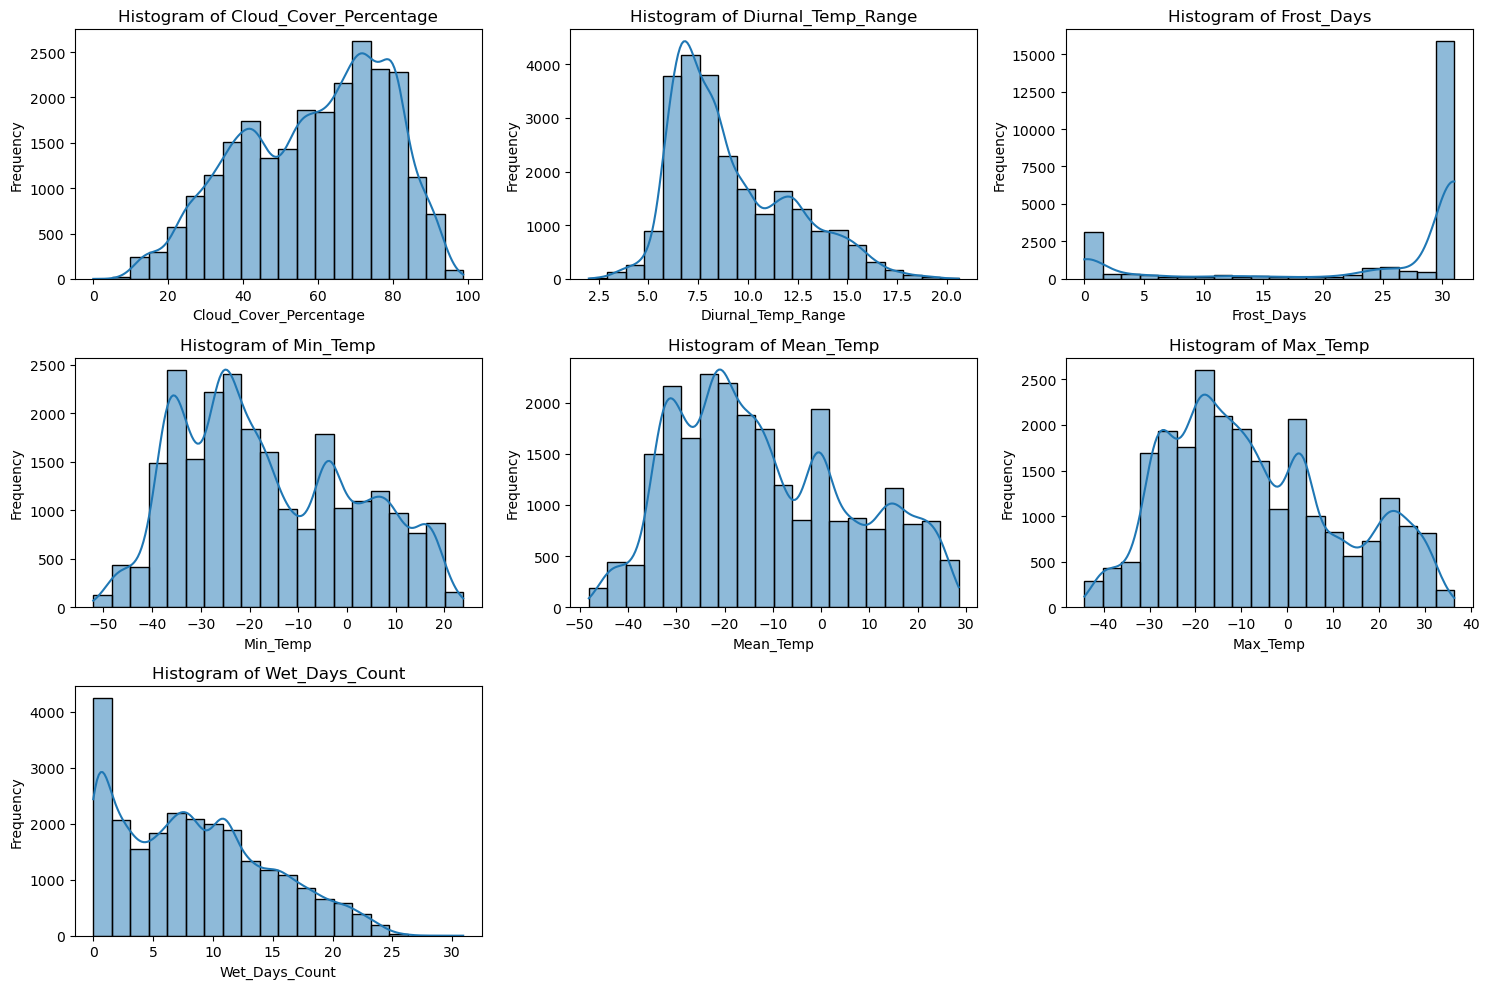

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df, columns, figsize=(15, 10)):
    plt.figure(figsize=figsize)

    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)  # Create a grid layout for subplots
        sns.histplot(df[column], bins=20, kde=True)  # Plot histogram with KDE
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()  # Adjust layout to fit all subplots
    plt.show()


# List of columns to plot
columns_to_plot = [
    'Cloud_Cover_Percentage', 
    'Diurnal_Temp_Range', 
    'Frost_Days', 
    'Min_Temp', 
    'Mean_Temp', 
    'Max_Temp', 
    'Wet_Days_Count'
]

# Call the function to create histograms
plot_histograms(df, columns_to_plot)


## percentage of outliers in columns

In [25]:
import pandas as pd

# Sample DataFrame (Replace this with your actual DataFrame)
def calculate_outlier_percentage(df, columns):
    outlier_percentages = {}
    
    for col in columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        # Store the outlier percentage for the column
        outlier_percentages[col] = round(outlier_percentage, 4)  # Round to 4 decimal places

    return outlier_percentages

# Columns to check for outliers
columns_to_check = [
    'Cloud_Cover_Percentage', 
    'Diurnal_Temp_Range', 
    'Frost_Days', 
    'Min_Temp', 
    'Mean_Temp', 
    'Max_Temp', 
    'Wet_Days_Count'
]

# Calculate outlier percentages
outlier_percentages=calculate_outlier_percentage(df, columns_to_check)

# Display the results
for col, percentage in outlier_percentages.items():
    print(f'Outlier percentage in {col}: {percentage}%')


Outlier percentage in Cloud_Cover_Percentage: 0.0%
Outlier percentage in Diurnal_Temp_Range: 0.5621%
Outlier percentage in Frost_Days: 19.8595%
Outlier percentage in Min_Temp: 0.0%
Outlier percentage in Mean_Temp: 0.0%
Outlier percentage in Max_Temp: 0.0%
Outlier percentage in Wet_Days_Count: 0.0124%


### solve for outliers with reduce from size

In [26]:
from scipy.stats import mstats

df["Diurnal_Temp_Range"]=df["Diurnal_Temp_Range"].apply(lambda x: 17 if x>17 else x)
df['Wet_Days_Count'] = np.log1p(df['Wet_Days_Count'])
df['Frost_Days'] = mstats.winsorize(df['Frost_Days'], limits=[0.01, 0.01])  # Adjust limits as needed


### box_blot after outliers

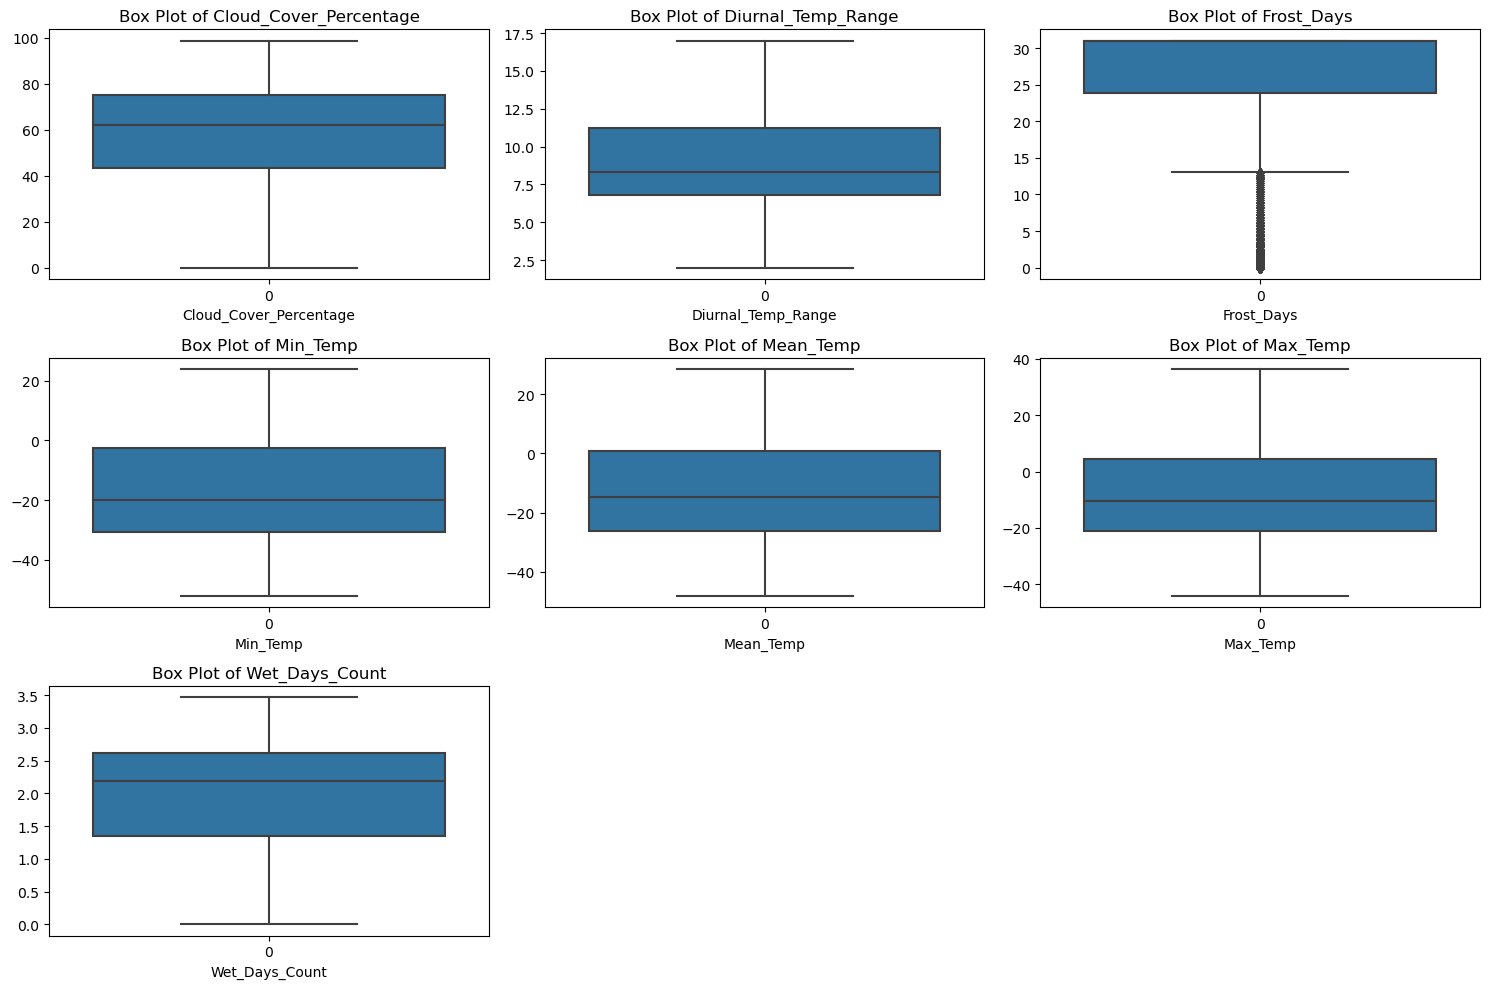

In [27]:
plot_boxplots(df, columns_to_plot)


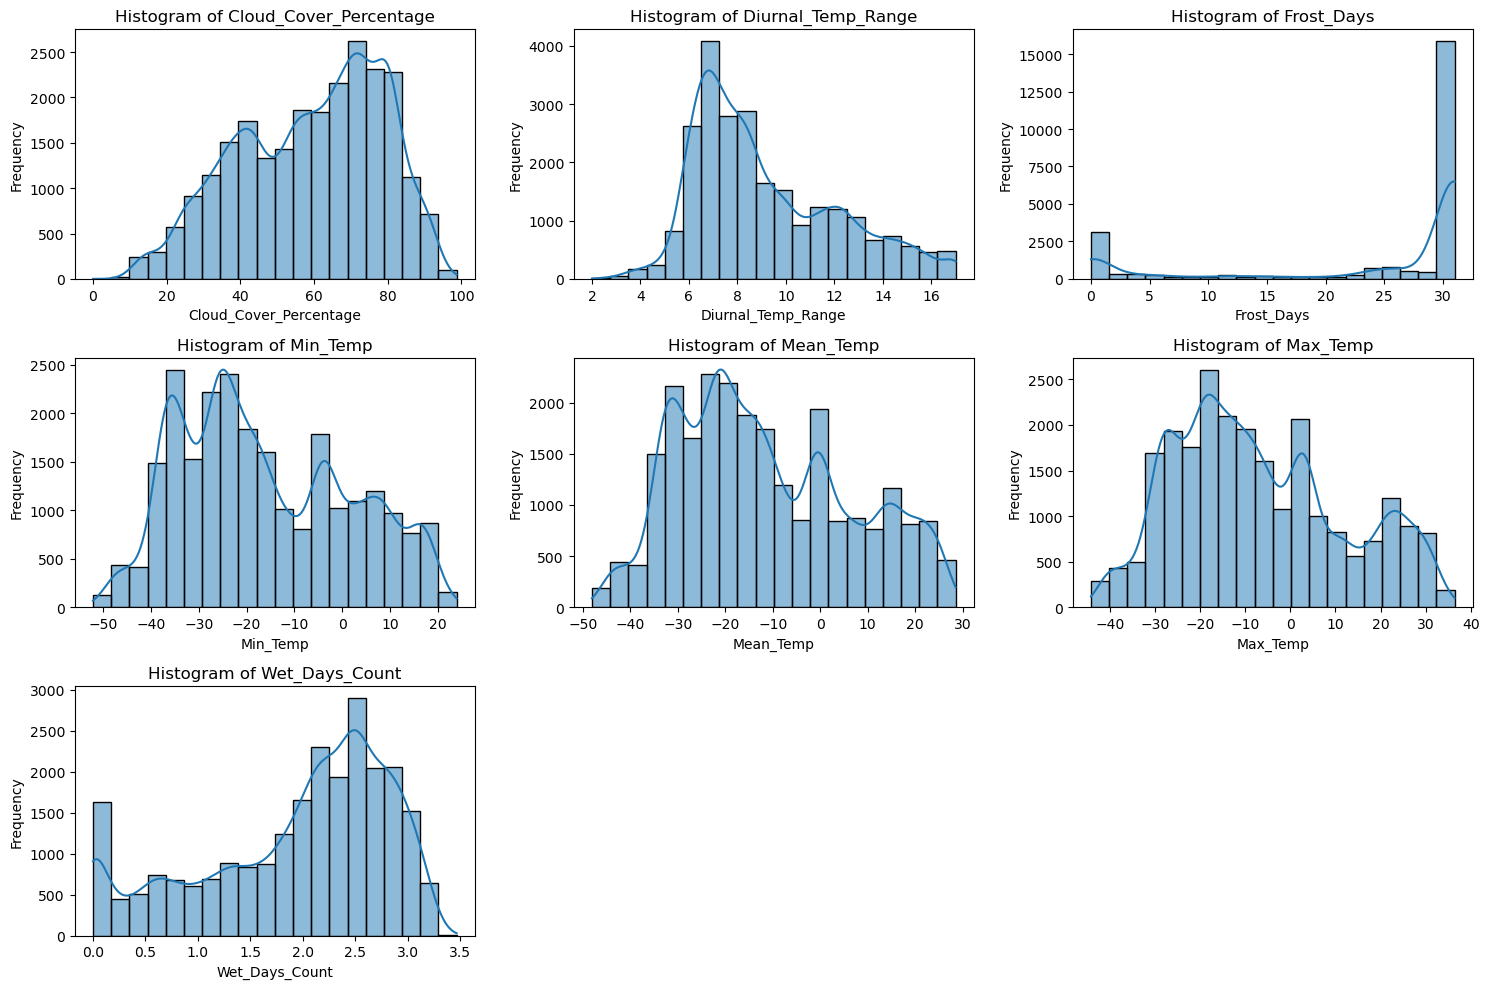

In [28]:
 
plot_histograms(df, columns_to_plot)


In [29]:
calculate_outlier_percentage(df, columns_to_check)

{'Cloud_Cover_Percentage': 0.0,
 'Diurnal_Temp_Range': 0.0,
 'Frost_Days': 19.8595,
 'Min_Temp': 0.0,
 'Mean_Temp': 0.0,
 'Max_Temp': 0.0,
 'Wet_Days_Count': 0.0}

### create df_copy from df(orignal dataset) becouse conver some numerical_columns to categorical do visualization

In [105]:
df_copy=df.copy()

In [106]:
df_copy.head()

,Longitude,Latitude,Cloud_Cover_Percentage,Diurnal_Temp_Range,Frost_Days,Evapotranspiration,Precipitation_Amount,Min_Temp,Mean_Temp,Max_Temp,Vapor_Pressure,Wet_Days_Count,elevation,Buffalo_Population,Cattle_Population,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,27970.983100,3691.746950,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,25063.646690,671.326701,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,6038.477155,1426.839831,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,270.367426,0.000000,1


In [107]:
df_copy["lumpy"].value_counts()

lumpy
0    21764
1     2431
Name: count, dtype: int64

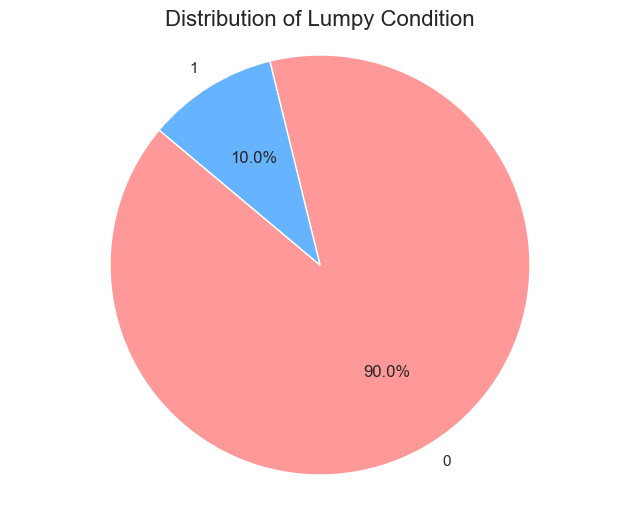

In [108]:
lumpy_counts = df_copy['lumpy'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(lumpy_counts, labels=lumpy_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Lumpy Condition', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
plt.show()

In [109]:
def classify_temperature(temp_celsius):
    if temp_celsius < 15:
        return "low"
    elif 15 <= temp_celsius <= 25:
        return "middle"
    else:
        return "high"
df_copy['Mean_Temp'] = df_copy['Mean_Temp'].apply(classify_temperature)
df_copy['Max_Temp'] = df_copy['Max_Temp'].apply(classify_temperature)
df_copy['Min_Temp'] = df_copy['Min_Temp'].apply(classify_temperature)
 



    

# Apply the function to the Mean_Temp, Max_Temp, and Min_Temp columns
 

In [110]:
df_copy["Mean_Temp"].value_counts()
 


Mean_Temp
low       21481
middle     2333
high        381
Name: count, dtype: int64

In [36]:
df_copy["Max_Temp"].value_counts()
 

Max_Temp
low       20231
middle     2261
high       1703
Name: count, dtype: int64

In [37]:
df_copy["Min_Temp"].value_counts()

Min_Temp
low       22810
middle     1385
Name: count, dtype: int64

## convert vapor_pressure to category

In [17]:
# Define a function to classify Vapor Pressure
def classify_vapor_pressure(vp):
    if vp < 10:
        return 'Low'
    elif 10 <= vp < 20:
        return 'Moderate'
    elif 20 <= vp < 30:
        return 'High'
    else:
        return 'Very High'

# Apply the classification function to the 'Vapor_Pressure' column
df_copy['Vapor_Pressure'] = df_copy['Vapor_Pressure'].apply(classify_vapor_pressure)

# Optional: Convert the new column to a categorical type
 

In [39]:
df_copy["Vapor_Pressure"].value_counts()

Vapor_Pressure
Low         21489
Moderate     2237
High          469
Name: count, dtype: int64

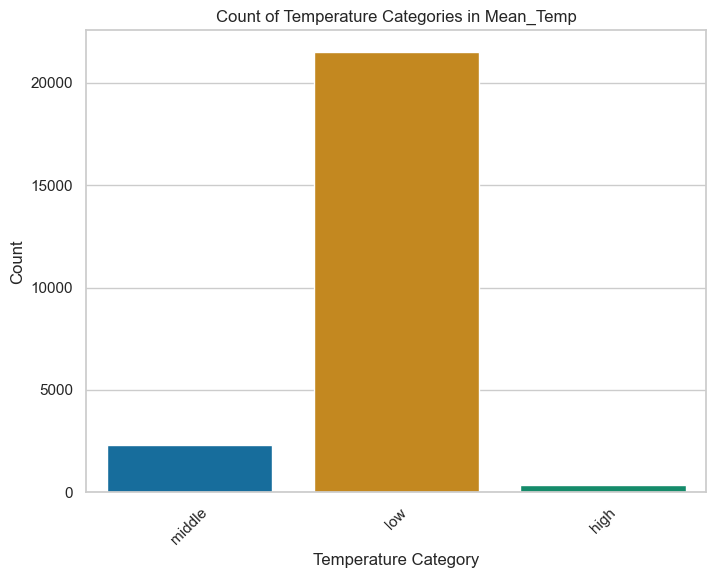

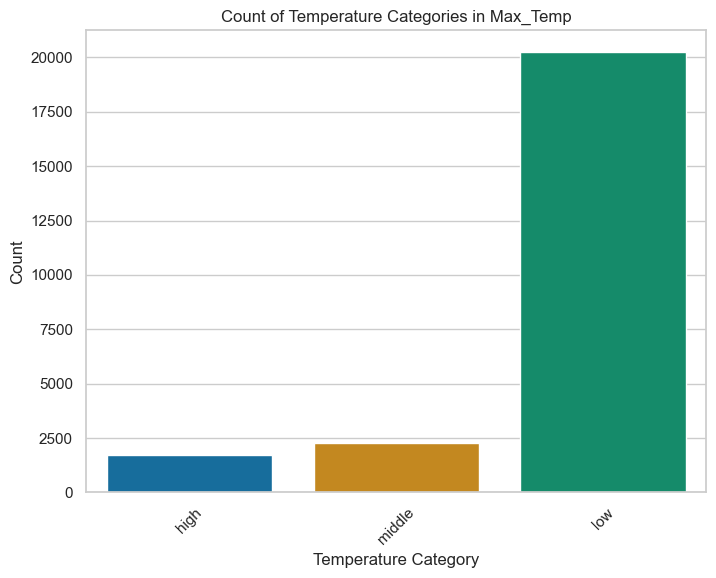

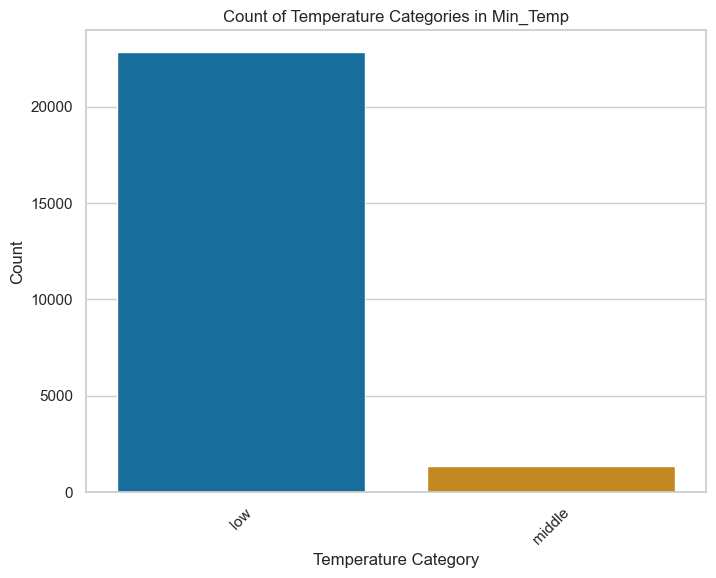

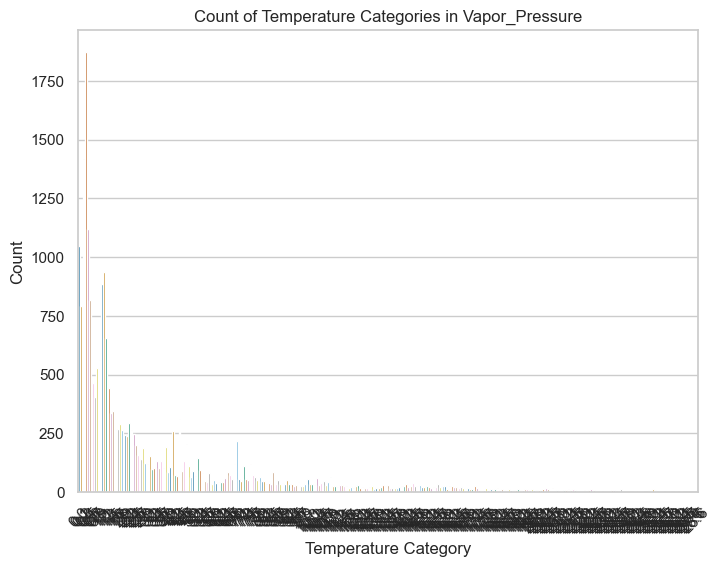

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define temperature columns
temperature_columns = ['Mean_Temp', 'Max_Temp', 'Min_Temp', 'Vapor_Pressure']

# Loop through temperature columns and create count plots with a colorblind-friendly palette
for col in temperature_columns:
    plt.figure(figsize=(8, 6))
    
    # Use the colorblind palette
    sns.countplot(x=col, data=df_copy, palette="colorblind")
    
    # Add titles and labels
    plt.title(f"Count of Temperature Categories in {col}")
    plt.ylabel('Count')
    plt.xlabel('Temperature Category')
    
    # Rotate x labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()


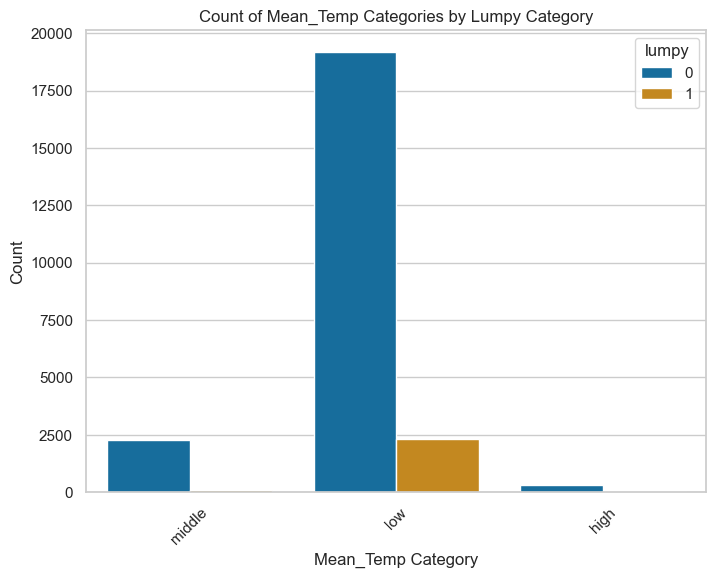

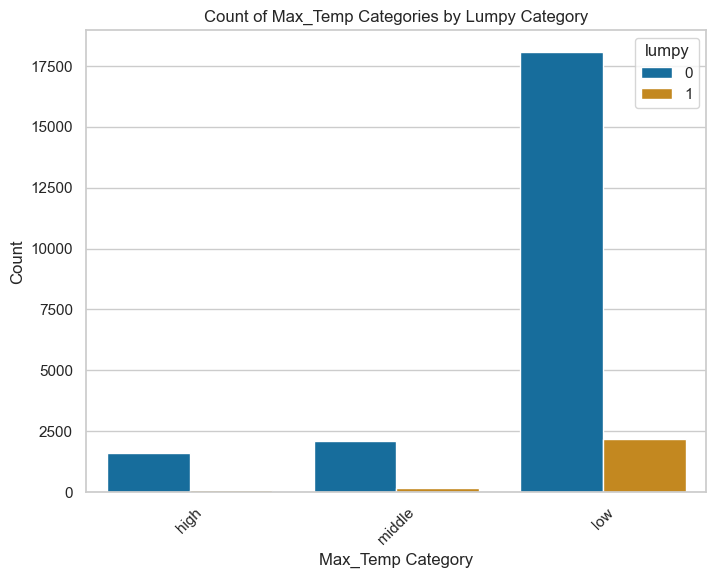

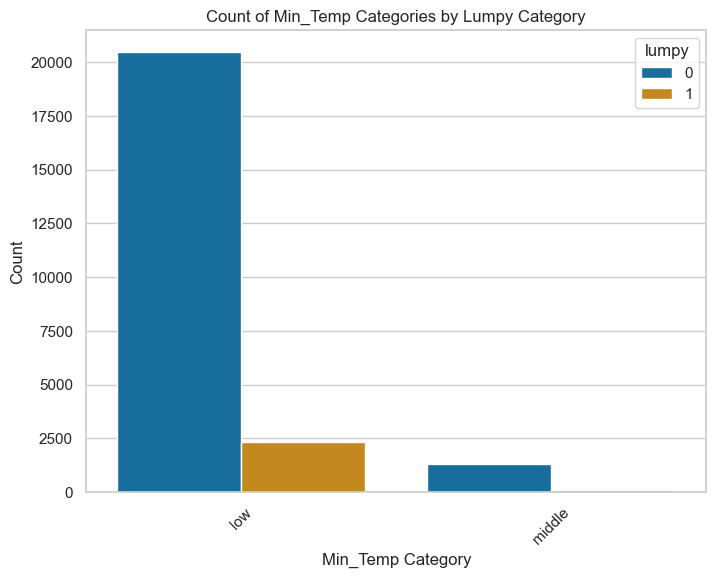

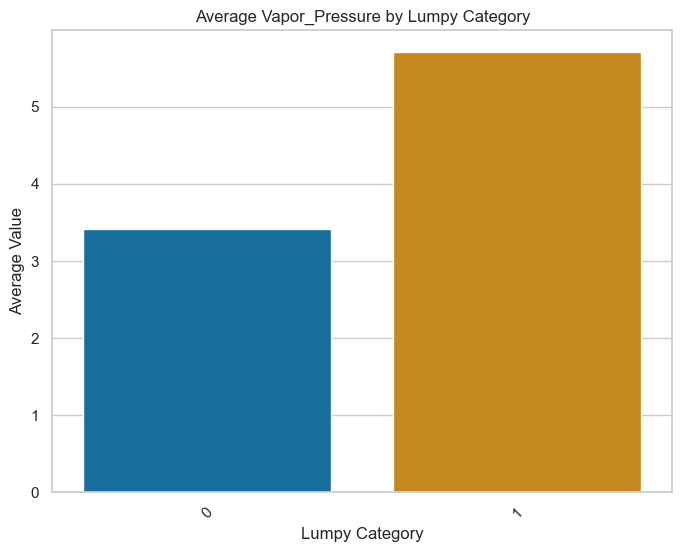

In [112]:

temperature_columns = ['Mean_Temp', 'Max_Temp', 'Min_Temp', 'Vapor_Pressure']

# Loop through temperature columns and create appropriate plots
for col in temperature_columns:
    plt.figure(figsize=(8, 6))
    
    # For categorical temperature columns, use countplot
    if col in ['Mean_Temp', 'Max_Temp', 'Min_Temp']:
        sns.countplot(x=col, hue='lumpy', data=df_copy, palette='colorblind')  # Change to colorblind palette
        plt.title(f"Count of {col} Categories by Lumpy Category")
    else:  # For numerical columns like 'Vapor_Pressure'
        sns.barplot(x='lumpy', y=col, data=df_copy, palette='colorblind', ci=None)  # Change to colorblind palette
        plt.title(f"Average {col} by Lumpy Category")
    
    # Adjust axis labels
    plt.ylabel('Count' if col in ['Mean_Temp', 'Max_Temp', 'Min_Temp'] else 'Average Value')
    plt.xlabel('Lumpy Category' if col == 'Vapor_Pressure' else f'{col} Category')
    
    # Rotate x labels if necessary
    plt.xticks(rotation=45)
    

## map for size spread disease

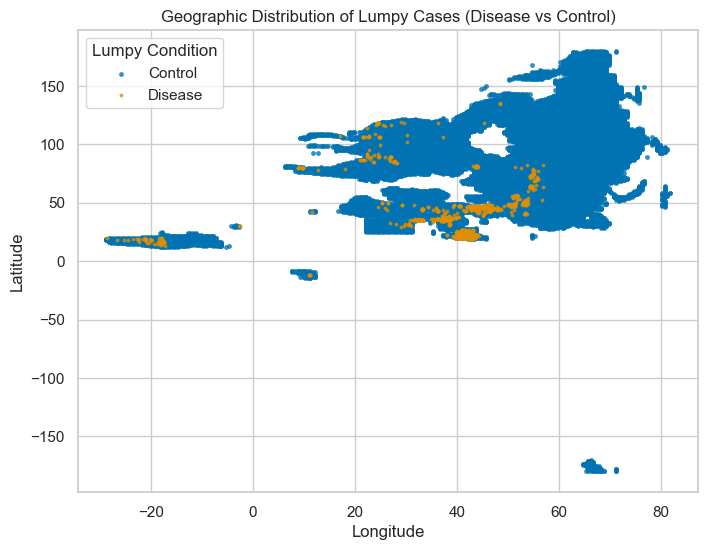

In [113]:
 

 
# Set the style and color palette
sns.set(style="whitegrid")
color_palette = sns.color_palette("colorblind", 2)  # Two colors for Control and Disease

# Split the dataset into two subsets: Control and Disease
df_control = df[df['lumpy'] == 0]
df_disease = df[df['lumpy'] == 1]

# Create the plot
plt.figure(figsize=(8,6))

# Plot Control points using the first color from the colorblind palette
sns.scatterplot(x='Latitude', y='Longitude', data=df_control, color=color_palette[0], s=10, label='Control', alpha=0.8, edgecolor=None)

# Plot Disease points using the second color from the colorblind palette
sns.scatterplot(x='Latitude', y='Longitude', data=df_disease, color=color_palette[1], s=6, label='Disease', alpha=0.8, edgecolor=None)

# Customize the plot
plt.title('Geographic Distribution of Lumpy Cases (Disease vs Control)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Lumpy Condition')

# Show the plot
plt.show()

# Show the plot

In [114]:
df_copy['lumpy'] = pd.Categorical(df['lumpy'].map({0: 'Control', 1: 'Disease'}))


In [115]:
lat_bins = [-90, -60, -30, 0, 30, 60, 90]
lat_labels = ['Very South', 'South', 'Mid-South', 'Mid-North', 'North', 'Very North']

long_bins = [-180, -120, -60, 0, 60, 120, 180]
long_labels = ['Far West', 'West', 'Mid-West', 'Mid-East', 'East', 'Far East']

# Apply binning
df_copy['Latitude'] = pd.cut(df_copy['Latitude'], bins=lat_bins, labels=lat_labels)
df_copy['Longitude'] = pd.cut(df_copy['Longitude'], bins=long_bins, labels=long_labels)
  

 

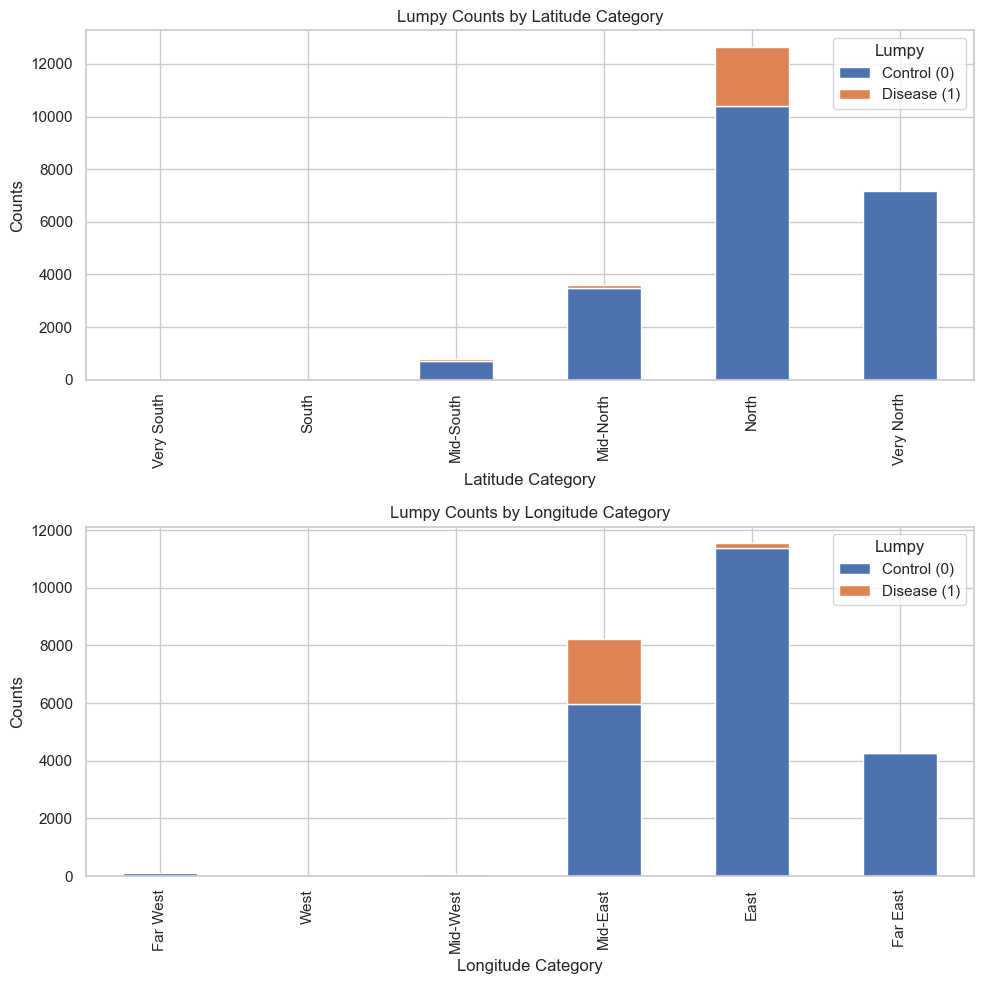

In [117]:
lat_lumpy_counts = df_copy.groupby(['Latitude', 'lumpy']).size().unstack(fill_value=0)
long_lumpy_counts = df_copy.groupby(['Longitude', 'lumpy']).size().unstack(fill_value=0)

# Set up the plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10))


lat_lumpy_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Lumpy Counts by Latitude Category')
axes[0].set_xlabel('Latitude Category')
axes[0].set_ylabel('Counts')
axes[0].legend(title='Lumpy', labels=['Control (0)', 'Disease (1)'], loc='upper right')

# Plot Longitude vs Lumpy
long_lumpy_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Lumpy Counts by Longitude Category')
axes[1].set_xlabel('Longitude Category')
axes[1].set_ylabel('Counts')
axes[1].legend(title='Lumpy', labels=['Control (0)', 'Disease (1)'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

 # Preprocessing

Key Steps Explained:
 

#### correlation

In [43]:
def corr_numerical(df):

  plt.figure(figsize=(30,10))
  plt.subplot(121)
  sns.heatmap(df.corr(),annot=True)
  plt.show()


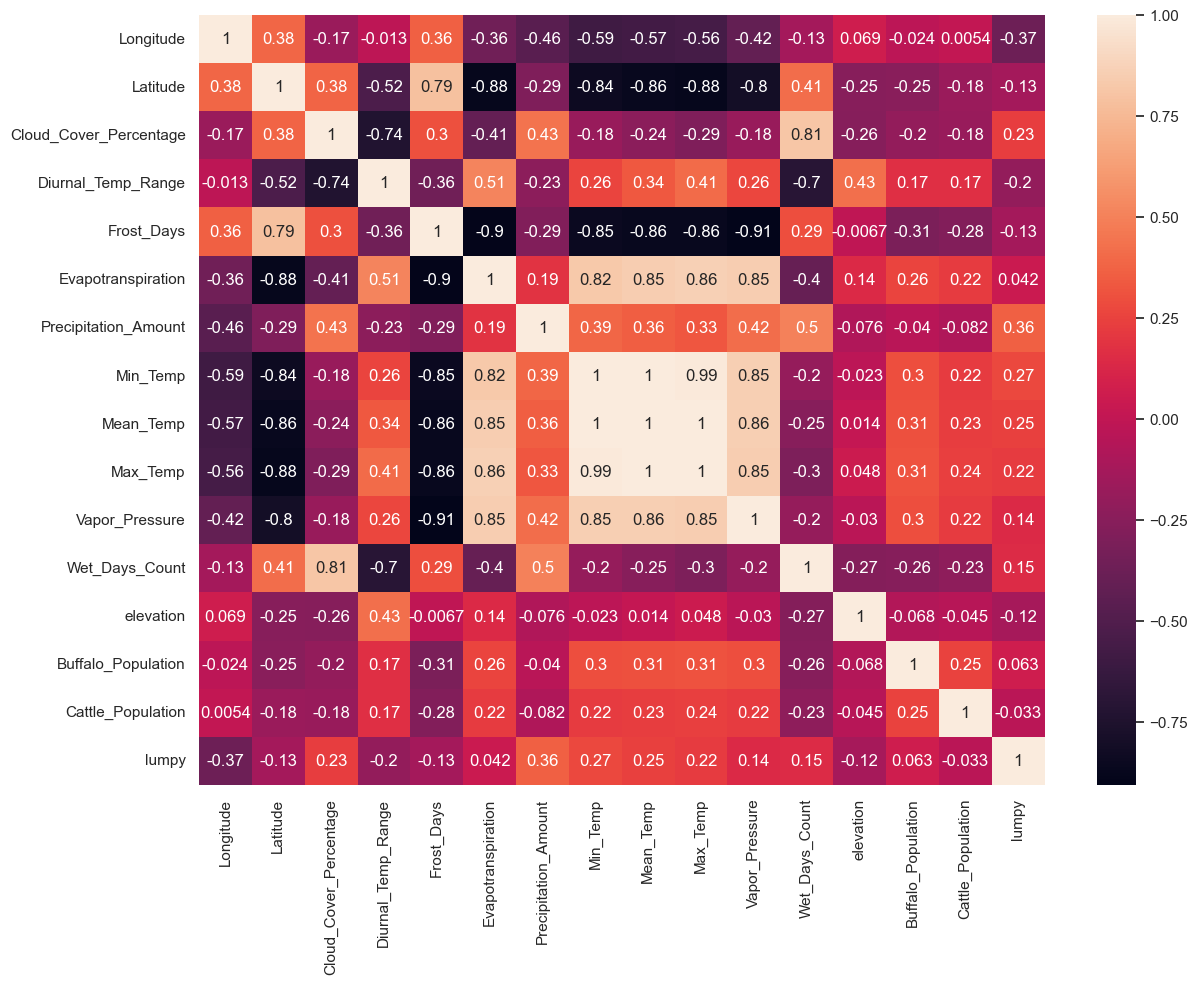

In [44]:
corr_numerical(df)

Given the high correlation between Min_Temp, Max_Temp, and Mean_Temp, you may want to consider removing one of these columns to simplify your analysis. Here are some options:

Keep Mean_Temp: Since it is a central measure, keeping the Mean_Temp might provide a good summary of the temperature data.
Remove Min_Temp or Max_Temp: If you keep Mean_Temp, you can remove either Min_Temp or Max_Temp since they provide overlapping information.

In [45]:
df= df.drop(columns=['Min_Temp', 'Max_Temp'])


### work on handle imbalance then scaling then feature selection

In [432]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [433]:
# Define features and target variable

X = df.drop(["lumpy"], axis=1)
y = df["lumpy"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)


### handle imbalance_dataset 

------

lumpy
1    21764
0    21764
Name: count, dtype: int64


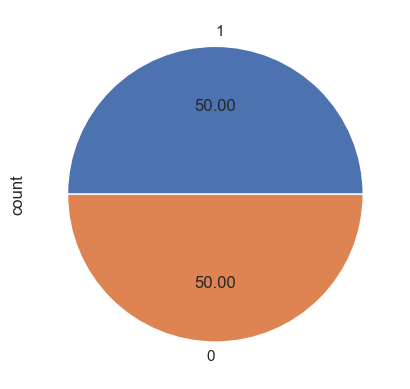

In [435]:
from imblearn.over_sampling import RandomOverSampler
rus= RandomOverSampler(sampling_strategy=1) 
#------------------------ if the col target is string not numeric then use the folloing> 
# rus=RandomUnderSampler(sampling_strategy="not minority")

x_res,y_res=rus.fit_resample(X,y)
print("------\n")
print(y_res.value_counts())
ax=y_res.value_counts().plot.pie(autopct='%.2f')

## scaling

In [436]:
# Feature scaling
scaler = StandardScaler()
x_res_scaled = scaler.fit_transform(x_res)
x_test_scaled = scaler.transform(x_test)  # Scale test set using the same scaler


## feature selection

In [437]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # You can change k to select fewer features
x_res_selected = selector.fit_transform(x_res_scaled, y_res)
x_test_selected = selector.transform(x_test_scaled)

In [438]:
# Check the selected features' scores
feature_scores = selector.scores_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})


In [439]:
# Display the scores
print(feature_importance.sort_values(by='Score', ascending=False))

                   Feature         Score
0                Longitude  29669.989616
6     Precipitation_Amount  13879.364626
7                Mean_Temp  12176.828847
2   Cloud_Cover_Percentage   9328.458614
3       Diurnal_Temp_Range   7115.368692
9           Wet_Days_Count   4102.953536
8           Vapor_Pressure   3095.430981
1                 Latitude   2817.513455
4               Frost_Days   2303.683363
10               elevation   1559.144759
11      Buffalo_Population    485.808479
5       Evapotranspiration    272.028521
12       Cattle_Population    180.614015
